# Company Earnings Time Series

In [ ]:
!pip install alpha_vantage
!pip install statsmodels
!pip install gluonts
!pip install mxnet

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
from gluonts.dataset.common import ListDataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import mxnet as mx 

In [ ]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'Mean Square Error is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'Mean Absolute Error is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'Root Mean Square Error is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'Mean Absolute Percentage Error is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 score is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 

## Google NetIncome Time Series

In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData

In [ ]:
fun_dat = FundamentalData(key=os.getenv('ALPHAVANTAGE_API_KEY'))

In [ ]:
googl_inc = fun_dat.get_income_statement_quarterly(symbol='GOOGL')

In [ ]:
df2 = pd.DataFrame(googl_inc[0])

In [ ]:
df2.columns

Index(['fiscalDateEnding', 'reportedCurrency', 'grossProfit', 'totalRevenue',
       'costOfRevenue', 'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome'],
      dtype='object')

In [ ]:
df2

fiscalDateEnding reportedCurrency  grossProfit totalRevenue costOfRevenue  \
0        2021-12-31              USD  42152000000  75140000000   32988000000   
1        2021-09-30              USD  37307000000  64928000000   27621000000   
2        2021-06-30              USD  35653000000  61880000000   26227000000   
3        2021-03-31              USD  31211000000  55314000000   24103000000   
4        2020-12-31              USD  30038000000  56118000000   26080000000   
5        2020-09-30              USD  25013000000  46130000000   21117000000   
6        2020-06-30              USD  19744000000  38297000000   18553000000   
7        2020-03-31              USD  22177000000  41159000000   18982000000   
8        2019-12-31              USD  24855000000  45569000000   21020000000   
9        2019-09-30              USD  22935000000  40503000000   17568000000   
10       2019-06-30              USD  21749000000  39045000000   17296000000   
11       2019-03-31              USD  20327000000  36339000000   16012000000   
12       2018-12-31              USD  21358000000  39276000000   17918000000   
13       2018-09-30              USD  19459000000  33740000000   14281000000   
14       2018-06-30              USD  18774000000  32657000000   13883000000   
15       2018-03-31              USD  17679000000  31146000000   13467000000   
16       2017-12-31              USD  18056000000  32323000000   14267000000   
17       2017-09-30              USD  16624000000  27772000000   11148000000   
18       2017-06-30              USD  15637000000  26010000000   10373000000   
19       2017-03-31              USD  14955000000  24750000000    9795000000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
0                 32988000000     21885000000                     11744000000   
1                 27621000000     21031000000                      8772000000   
2                 26227000000     19361000000                      8617000000   
3                 24103000000     16437000000                      7289000000   
4                 26080000000     15651000000                      8145000000   
5                 21117000000     11213000000                      6987000000   
6                 18553000000      6383000000                      6486000000   
7                 18982000000      7977000000                      7380000000   
8                 21020000000      9266000000                      8567000000   
9                 17568000000      9177000000                      7200000000   
10                17296000000      9180000000                      6255000000   
11                16012000000      6608000000                      5993000000   
12                17918000000      8221000000                      7121000000   
13                14281000000      8625000000                      5917000000   
14                13883000000      3045000000                      5782000000   
15                13467000000      7633000000                      5639000000   
16                14267000000      7696000000                      6086000000   
17                11148000000      7782000000                      4637000000   
18                10373000000      4132000000                      4597000000   
19                 9795000000      6568000000                      4445000000   

   researchAndDevelopment operatingExpenses  ... depreciation  \
0              8708000000       20452000000  ...         None   
1              7694000000       16466000000  ...         None   
2              7675000000       16292000000  ...         None   
3              7485000000       14774000000  ...         None   
4              7022000000       15167000000  ...         None   
5              6856000000       13843000000  ...         None   
6              6875000000       13361000000  ...         None   
7              6820000000       14200000000  ...         None   
8              7222000000       157

In [ ]:
# make it ascending 
df2 = df2[::-1]

In [ ]:
df2.rename(columns={'fiscalDateEnding': 'time'},inplace=True)
df2.time = pd.to_datetime(df2.time)
df2.dtypes

time                                 datetime64[ns]
reportedCurrency                             object
grossProfit                                  object
totalRevenue                                 object
costOfRevenue                                object
costofGoodsAndServicesSold                   object
operatingIncome                              object
sellingGeneralAndAdministrative              object
researchAndDevelopment                       object
operatingExpenses                            object
investmentIncomeNet                          object
netInterestIncome                            object
interestIncome                               object
interestExpense                              object
nonInterestIncome                            object
otherNonOperatingIncome                      object
depreciation                                 object
depreciationAndAmortization                  object
incomeBeforeTax                              object
incomeTaxExp

In [ ]:
df2.head()

time reportedCurrency  grossProfit totalRevenue costOfRevenue  \
19 2017-03-31              USD  14955000000  24750000000    9795000000   
18 2017-06-30              USD  15637000000  26010000000   10373000000   
17 2017-09-30              USD  16624000000  27772000000   11148000000   
16 2017-12-31              USD  18056000000  32323000000   14267000000   
15 2018-03-31              USD  17679000000  31146000000   13467000000   

   costofGoodsAndServicesSold operatingIncome sellingGeneralAndAdministrative  \
19                 9795000000      6568000000                      4445000000   
18                10373000000      4132000000                      4597000000   
17                11148000000      7782000000                      4637000000   
16                14267000000      7696000000                      6086000000   
15                13467000000      7633000000                      5639000000   

   researchAndDevelopment operatingExpenses  ... depreciation  \
19             3942000000        8387000000  ...         None   
18             4172000000        8769000000  ...         None   
17             4205000000        8842000000  ...         None   
16             4306000000       10392000000  ...         None   
15             5039000000       10678000000  ...         None   

   depreciationAndAmortization incomeBeforeTax incomeTaxExpense  \
19                  1503000000      6819000000       1393000000   
18                  1625000000      4377000000        853000000   
17                  1761000000      7979000000       1247000000   
16                  2026000000      8018000000      11038000000   
15                  1986000000     10543000000       1142000000   

   interestAndDebtExpense netIncomeFromContinuingOperations  \
19               25000000                        5377000000   
18               21000000                        3511000000   
17               27000000                        6701000000   
16               36000000                       -3083000000   
15               30000000                        9401000000   

   comprehensiveIncomeNetOfTax         ebit       ebitda    netIncome  
19                  5659000000   6844000000   8347000000   5426000000  
18                  3965000000   4398000000   6023000000   3524000000  
17                  7714000000   8006000000   9767000000   6732000000  
16                 -3266000000   8054000000    256000000  -3020000000  
15                  9821000000  10573000000  12559000000   9401000000  

[5 rows x 26 columns]

## We will pick netIncome as our target variable

In [ ]:
df2.netIncome = df2.netIncome.astype(int)
df2 = df2[['time', 'netIncome']]
df2 = df2.set_index('time')
df2 = df2.asfreq('Q')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-03-31 to 2021-12-31
Freq: Q-DEC
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   netIncome  20 non-null     int64
dtypes: int64(1)
memory usage: 320.0 bytes


<AxesSubplot:xlabel='time'>

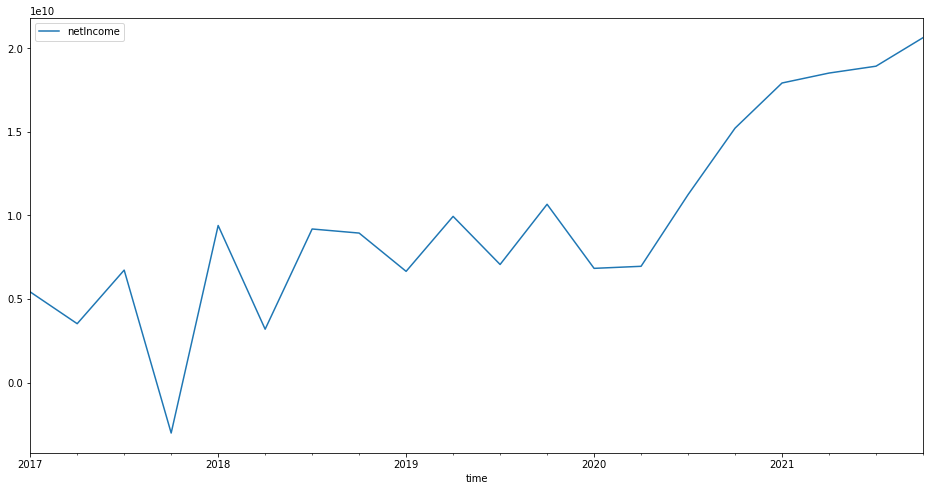

In [ ]:
df2.plot(figsize=(16,8))

In [ ]:
df2.index

DatetimeIndex(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31',
               '2021-03-31', '2021-06-30', '2021-09-30', '2021-12-31'],
              dtype='datetime64[ns]', name='time', freq='Q-DEC')

In [ ]:
df2.head()

netIncome
time                  
2017-03-31  5426000000
2017-06-30  3524000000
2017-09-30  6732000000
2017-12-31 -3020000000
2018-03-31  9401000000

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2020,9,30)
test_dataset_end = datetime(2021,12,31)

In [ ]:
train_data = df2[:train_dataset_end]
test_data = df2[train_dataset_end+timedelta(days=90):test_dataset_end]

In [ ]:
test_data

netIncome
time                   
2020-12-31  15227000000
2021-03-31  17930000000
2021-06-30  18525000000
2021-09-30  18936000000
2021-12-31  20642000000

<AxesSubplot:xlabel='time'>

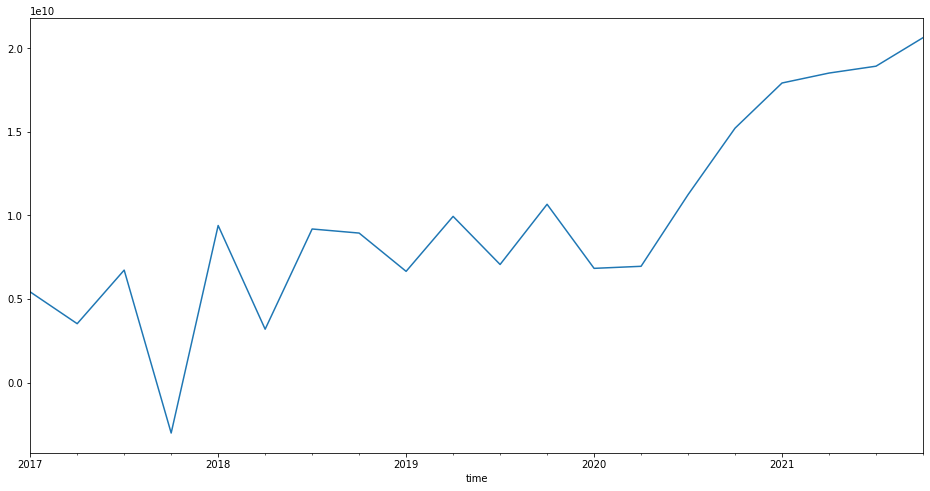

In [ ]:
df2['netIncome'].plot(figsize=(16,8))

In [ ]:
df2['netIncome differencing'] = df2['netIncome'] - df2['netIncome'].shift(1)  
df2['netIncome second differencing'] = df2['netIncome differencing'] - df2['netIncome differencing'].shift(1) 

In [ ]:
from statsmodels.tsa.stattools import adfuller 

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df2['netIncome differencing'].dropna())

ADF Statistics: -0.8563153986006601
p- value: 0.8020179288109821
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
adf_test(df2['netIncome second differencing'].dropna())

ADF Statistics: -4.273568197417466
p- value: 0.0004934322044224365
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


Two times differencing to get p < 0.05. Integration value: d = 2

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

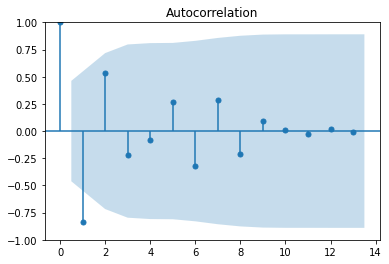

In [ ]:
acf = plot_acf(df2['netIncome second differencing'].dropna())

MA q = 1

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


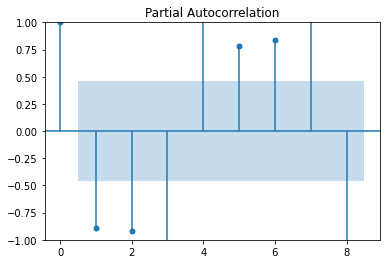

In [ ]:
pacf = plot_pacf(df2['netIncome second differencing'].dropna(), lags=8)

AR p = 8

In [ ]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model_ARIMA = ARIMA(train_data['netIncome'], order=(8,2,1))
model_ARIMA_fit = model_ARIMA.fit()
model_ARIMA_fit.summary()

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:              netIncome   No. Observations:                      15
Model:                 ARIMA(8, 2, 1)   Log Likelihood      -8579158988123250.000
Date:                Fri, 08 Apr 2022   AIC                 17158317976246520.000
Time:                        16:49:35   BIC                 17158317976246526.000
Sample:                    03-31-2017   HQIC                17158317976246518.000
                         - 09-30-2020                                            
Covariance Type:                  opg                                            
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2341   1.21e-16  -1.02e+16      0.000      -1.234      -1.234
ar.L2         -0.4603   4.72e-16  -9.76e+14      0.000      -0.460      -0.460
ar.L3         -0.9315   7.97e-16  -1.17e+15      0.000      -0.931      -0.931
ar.L4         -2.1498   2.33e-15  -9.24e+14      0.000      -2.150      -2.150
ar.L5         -0.9311   8.09e-16  -1.15e+15      0.000      -0.931      -0.931
ar.L6         -0.4583   4.55e-16  -1.01e+15      0.000      -0.458      -0.458
ar.L7         -1.2317   1.13e-16  -1.09e+16      0.000      -1.232      -1.232
ar.L8         -0.9991   7.18e-17  -1.39e+16      0.000      -0.999      -0.999
ma.L1         -0.9976   3.59e-16  -2.78e+15      0.000      -0.998      -0.998
sigma2      2469.8591   1.44e-19   1.71e+22      0.000    2469.859    2469.859
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.29   Prob(JB):                         0.86
Heteroskedasticity (H):           88064.52   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.13e+24. Standard errors may be unstable.
"""

In [ ]:
# prediction 
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2020-12-31 00:00:00
2021-12-31 00:00:00


In [ ]:
pred=model_ARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['netIncome']-pred

In [ ]:
pred

2020-12-31    1.021858e+10
2021-03-31    1.809969e+10
2021-06-30    1.102192e+10
2021-09-30    1.220442e+10
2021-12-31    1.020292e+10
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [ ]:
residuals

time
2020-12-31    5.008421e+09
2021-03-31   -1.696898e+08
2021-06-30    7.503075e+09
2021-09-30    6.731584e+09
2021-12-31    1.043908e+10
Freq: Q-DEC, dtype: float64

<AxesSubplot:ylabel='Density'>

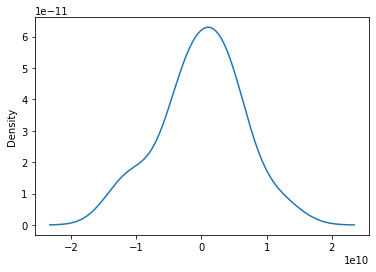

In [ ]:
model_ARIMA_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA'] = pred

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_3721/284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<AxesSubplot:xlabel='time'>

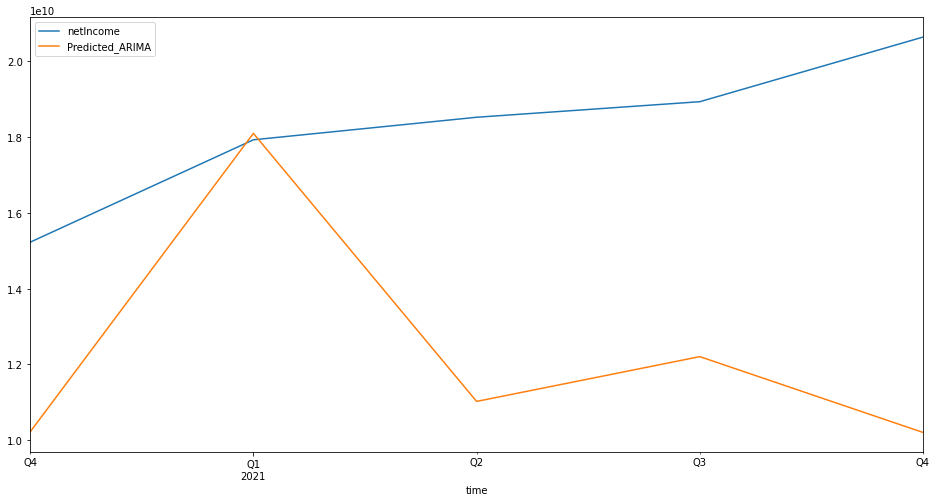

In [ ]:
test_data[['netIncome', 'Predicted_ARIMA']].plot(figsize=(16,8))

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df2['netIncome yearly differencing'] = df2['netIncome'] - df2['netIncome'].shift(4) # yearly = 4*quarterly  


/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


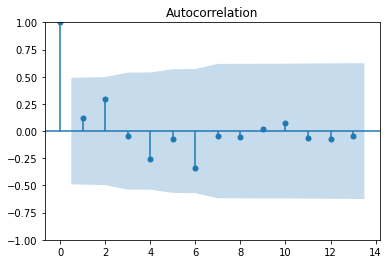

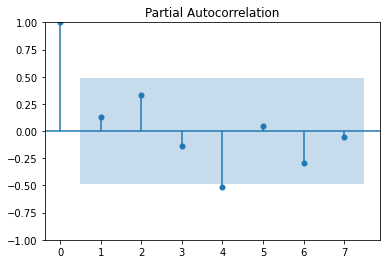

In [ ]:
acf12 = plot_acf(df2['netIncome yearly differencing'].dropna())
pacf12 = plot_pacf(df2['netIncome yearly differencing'].dropna(), lags=7)

MA q = 0, AR p = 4

In [ ]:
model_SARIMAX = SARIMAX(train_data['netIncome'], order=(4,1,0), seasonal_order=(0,0,0,4))
model_SARIMAX_fit = model_SARIMAX.fit()
model_SARIMAX_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26838D+01    |proj g|=  1.45806D+00

At iterate    5    f=  2.21578D+01    |proj g|=  5.01420D-02

At iterate   10    f=  2.21544D+01    |proj g|=  7.69829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   4.315D-06   2.215D+01
  F =   22.154371246990827     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              netIncome   No. Observations:                   15
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -332.316
Date:                Fri, 08 Apr 2022   AIC                            674.631
Time:                        16:49:36   BIC                            677.826
Sample:                    03-31-2017   HQIC                           674.335
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0810      0.147     -7.333      0.000      -1.370      -0.792
ar.L2         -0.4546      0.193     -2.359      0.018      -0.832      -0.077
ar.L3         -0.2111      0.235     -0.898      0.369      -0.672       0.250
ar.L4         -0.1378      0.261     -0.529      0.597      -0.649       0.373
sigma2      3.216e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 5.62
Prob(Q):                              0.54   Prob(JB):                         0.06
Heteroskedasticity (H):               0.23   Skew:                            -1.37
Prob(H) (two-sided):                  0.13   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.31e+54. Standard errors may be unstable.
"""

In [ ]:
pred_SARIMAX = model_SARIMAX_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['netIncome'] - pred_SARIMAX

<AxesSubplot:xlabel='time'>

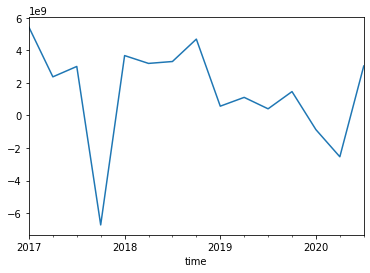

In [ ]:
model_SARIMAX_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

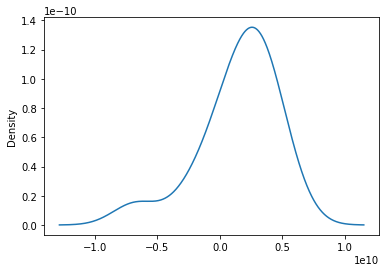

In [ ]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_SARIMAX'] = pred_SARIMAX

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_3721/1953269687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_SARIMAX


<AxesSubplot:xlabel='time'>

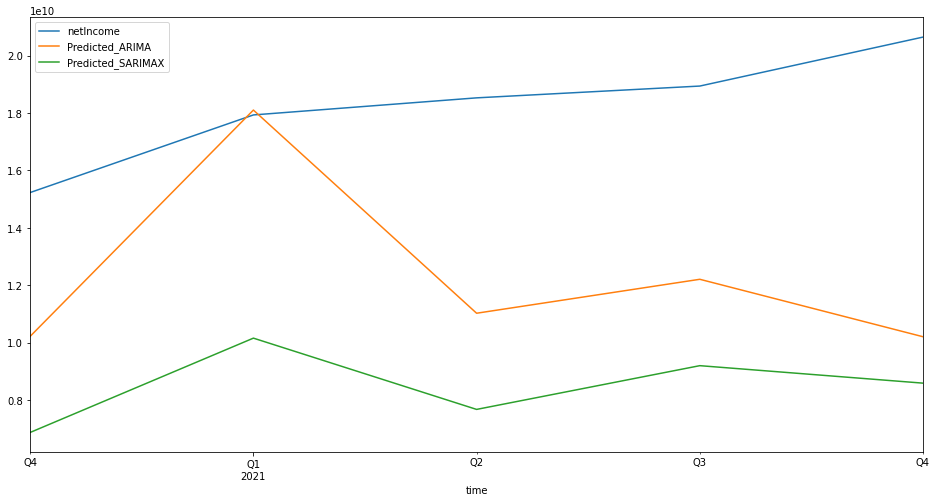

In [ ]:
test_data[['netIncome', 'Predicted_ARIMA', 'Predicted_SARIMAX']].plot(figsize=(16,8))

## Orbit - Damped Local Trend (DLP) model

We have issue with this model for this data. Thus we skip it.

## Prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
train_df.columns

Index(['time', 'netIncome'], dtype='object')

In [ ]:
proph_train = train_df.rename(columns={'time':'ds', 'netIncome': 'y'})
proph_test = test_df.rename(columns={'time':'ds', 'netIncome': 'y'})

In [ ]:
proph_train.shape, proph_test.shape, train_df.shape, test_df.shape

((15, 2), (5, 2), (15, 2), (5, 2))

In [ ]:
m = Prophet()
m.fit(proph_train)
future = m.make_future_dataframe(periods=len(proph_test), freq='Q')
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:n_changepoints greater than number of observations. Using 11.
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -60.8311
Iteration  1. Log joint probability =    6.05135. Improved by 66.8824.
Iteration  2. Log joint probability =    12.1265. Improved by 6.07519.
Iteration  3. Log joint probability =    17.4707. Improved by 5.34419.
Iteration  4. Log joint probability =    19.9001. Improved by 2.42937.
Iteration  5. Log joint probability =    20.1364. Improved by 0.236305.
Iteration  6. Log joint probability =    20.1697. Improved by 0.0332906.
Iteration  7. Log joint probability =    20.1908. Improved by 0.0211534.
Iteration  8. Log joint probability =     20.219. Improved by 0.0281155.
Iteration  9. Log joint probability =    20.2392. Improved by 0.0202004.
Iteration 10. Log joint probability =    20.2933. Improved by 0.0541852.
Iteration 11. Log joint probability =    20.2965. Improved by 0.00311873.
Iteration 12. Log joint probability =    20.4641. Improved by 0.167655.
Iteration 13. Log joint probability =    20.4661. Improved by 0.00199821.
Iteration 14. Log

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2017-03-31 -1.306051e+09  2.969503e+09  7.520642e+09 -1.306051e+09   
1 2017-06-30 -1.039290e+09  1.595197e+09  5.943255e+09 -1.039290e+09   
2 2017-09-30 -7.695966e+08  5.228614e+09  9.621783e+09 -7.695966e+08   
3 2017-12-31 -4.999036e+08 -3.373457e+09  9.285401e+08 -4.999036e+08   
4 2018-03-31 -2.360736e+08  4.597032e+09  8.992633e+09 -2.360736e+08   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0 -1.306051e+09    6.518844e+09          6.518844e+09          6.518844e+09   
1 -1.039290e+09    4.774025e+09          4.774025e+09          4.774025e+09   
2 -7.695966e+08    8.148346e+09          8.148346e+09          8.148346e+09   
3 -4.999036e+08   -7.111951e+08         -7.111951e+08         -7.111951e+08   
4 -2.360736e+08    7.073279e+09          7.073279e+09          7.073279e+09   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  6.518844e+09  6.518844e+09  6.518844e+09                   0.0   
1  4.774025e+09  4.774025e+09  4.774025e+09                   0.0   
2  8.148346e+09  8.148346e+09  8.148346e+09                   0.0   
3 -7.111951e+08 -7.111951e+08 -7.111951e+08                   0.0   
4  7.073279e+09  7.073279e+09  7.073279e+09                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  5.212793e+09  
1                         0.0                         0.0  3.734736e+09  
2                         0.0                         0.0  7.378750e+09  
3                         0.0                         0.0 -1.211099e+09  
4                         0.0                         0.0  6.837206e+09

In [ ]:
forecast.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
15 2020-12-31  2.712960e+09 -5.721773e+09 -1.422703e+09  2.712960e+09   
16 2021-03-31  2.976790e+09  7.400921e+09  1.167492e+10  2.976790e+09   
17 2021-06-30  3.243552e+09  5.947510e+09  1.010509e+10  3.243552e+09   
18 2021-09-30  3.513245e+09  9.502277e+09  1.385171e+10  3.513245e+09   
19 2021-12-31  3.782938e+09  7.339003e+08  5.172797e+09  3.782938e+09   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
15  2.712960e+09   -6.385354e+09         -6.385354e+09         -6.385354e+09   
16  2.976790e+09    6.518844e+09          6.518844e+09          6.518844e+09   
17  3.243552e+09    4.774025e+09          4.774025e+09          4.774025e+09   
18  3.513245e+09    8.148346e+09          8.148346e+09          8.148346e+09   
19  3.782938e+09   -7.111951e+08         -7.111951e+08         -7.111951e+08   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
15 -6.385354e+09 -6.385354e+09 -6.385354e+09                   0.0   
16  6.518844e+09  6.518844e+09  6.518844e+09                   0.0   
17  4.774025e+09  4.774025e+09  4.774025e+09                   0.0   
18  8.148346e+09  8.148346e+09  8.148346e+09                   0.0   
19 -7.111951e+08 -7.111951e+08 -7.111951e+08                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper          yhat  
15                         0.0                         0.0 -3.672393e+09  
16                         0.0                         0.0  9.495635e+09  
17                         0.0                         0.0  8.017577e+09  
18                         0.0                         0.0  1.166159e+10  
19                         0.0                         0.0  3.071743e+09

In [ ]:
test_data.tail()

netIncome  Predicted_ARIMA  Predicted_SARIMAX
time                                                       
2020-12-31  15227000000     1.021858e+10       6.869199e+09
2021-03-31  17930000000     1.809969e+10       1.015425e+10
2021-06-30  18525000000     1.102192e+10       7.671395e+09
2021-09-30  18936000000     1.220442e+10       9.195236e+09
2021-12-31  20642000000     1.020292e+10       8.586397e+09

In [ ]:
forecast[-5:].shape

(5, 16)

In [ ]:
forecast.shape

(20, 16)

In [ ]:
test_data.shape

(5, 3)

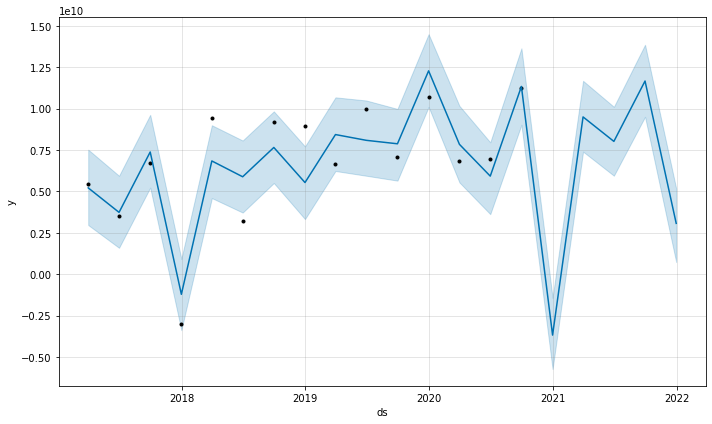

In [ ]:
fig1 = m.plot(forecast)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


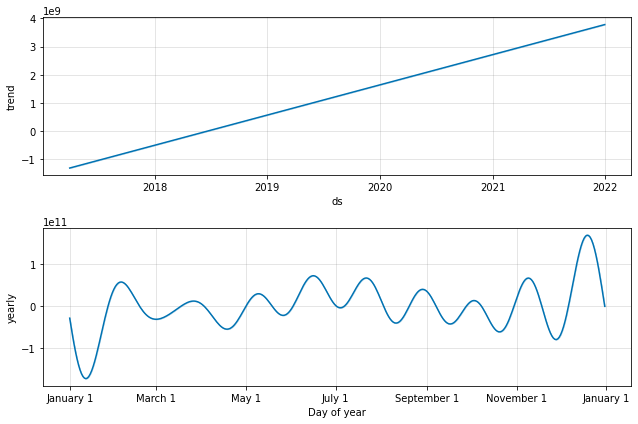

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
forecast[-5:][['ds', 'yhat']]

ds          yhat
15 2020-12-31 -3.672393e+09
16 2021-03-31  9.495635e+09
17 2021-06-30  8.017577e+09
18 2021-09-30  1.166159e+10
19 2021-12-31  3.071743e+09

In [ ]:
test_data.index

DatetimeIndex(['2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30',
               '2021-12-31'],
              dtype='datetime64[ns]', name='time', freq='Q-DEC')

In [ ]:
test_data['Predicted_Prophet'] = forecast[-5:][['ds', 'yhat']].set_index('ds')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_3721/2791905600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_Prophet'] = forecast[-5:][['ds', 'yhat']].set_index('ds')


In [ ]:
test_data.head()

netIncome  Predicted_ARIMA  Predicted_SARIMAX  Predicted_Prophet
time                                                                          
2020-12-31  15227000000     1.021858e+10       6.869199e+09      -3.672393e+09
2021-03-31  17930000000     1.809969e+10       1.015425e+10       9.495635e+09
2021-06-30  18525000000     1.102192e+10       7.671395e+09       8.017577e+09
2021-09-30  18936000000     1.220442e+10       9.195236e+09       1.166159e+10
2021-12-31  20642000000     1.020292e+10       8.586397e+09       3.071743e+09

<AxesSubplot:xlabel='time'>

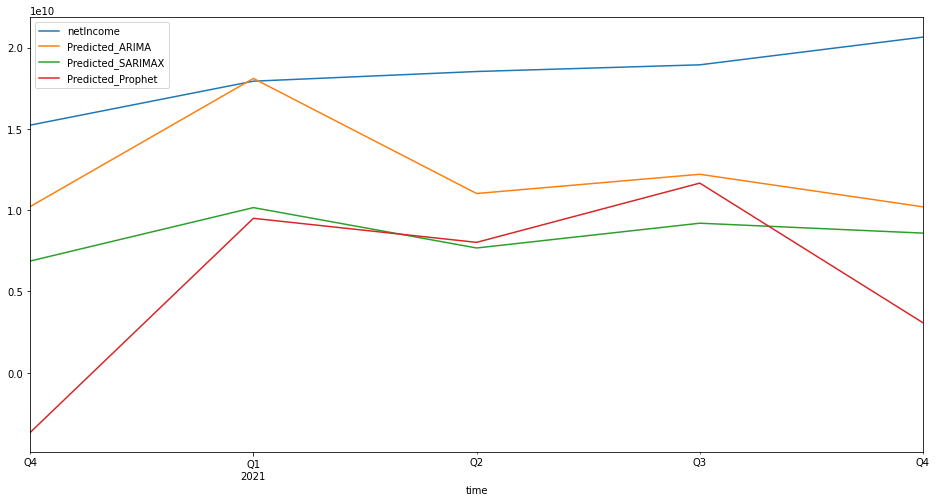

In [ ]:
test_data[['netIncome', 'Predicted_ARIMA', 'Predicted_SARIMAX', #'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat', 
           'Predicted_Prophet']].plot(figsize=(16,8))

### DeepAR

In [ ]:
df2.shape

(20, 4)

In [ ]:
df2.tail()

netIncome  netIncome differencing  \
time                                              
2020-12-31  15227000000            3.980000e+09   
2021-03-31  17930000000            2.703000e+09   
2021-06-30  18525000000            5.950000e+08   
2021-09-30  18936000000            4.110000e+08   
2021-12-31  20642000000            1.706000e+09   

            netIncome second differencing  netIncome yearly differencing  
time                                                                      
2020-12-31                  -3.080000e+08                   4.556000e+09  
2021-03-31                  -1.277000e+09                   1.109400e+10  
2021-06-30                  -2.108000e+09                   1.156600e+10  
2021-09-30                  -1.840000e+08                   7.689000e+09  
2021-12-31                   1.295000e+09                   5.415000e+09

In [ ]:
df2.head()

netIncome  netIncome differencing  netIncome second differencing  \
time                                                                            
2017-03-31  5426000000                     NaN                            NaN   
2017-06-30  3524000000           -1.902000e+09                            NaN   
2017-09-30  6732000000            3.208000e+09                   5.110000e+09   
2017-12-31 -3020000000           -9.752000e+09                  -1.296000e+10   
2018-03-31  9401000000            1.242100e+10                   2.217300e+10   

            netIncome yearly differencing  
time                                       
2017-03-31                            NaN  
2017-06-30                            NaN  
2017-09-30                            NaN  
2017-12-31                            NaN  
2018-03-31                   3.975000e+09

In [ ]:
train_data.head()

netIncome
time                  
2017-03-31  5426000000
2017-06-30  3524000000
2017-09-30  6732000000
2017-12-31 -3020000000
2018-03-31  9401000000

In [ ]:
start = pd.Timestamp("2020-12-31", freq="Q")
train_ds = ListDataset([{'target': train_data.netIncome, 'start': start}], freq='Q')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_3721/47814818.py:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  start = pd.Timestamp("2020-12-31", freq="Q")


Test dataset: use the whole dataset, add 'target' and 'start' field

In [ ]:
test_ds = ListDataset([{'target': df2.netIncome, 'start': start}], freq='Q')

In [ ]:
np.random.seed(42)
mx.random.seed(42)

estimator = DeepAREstimator(
    prediction_length=5,
    context_length=5,
    freq='Q',
    trainer=Trainer( # ctx="gpu",
                    epochs=25, learning_rate=1e-3, num_batches_per_epoch=100)
)
predictor = estimator.train(train_ds)

/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/dataset/common.py:338: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return timestamp.freq.rollforward(timestamp)
/Users/wismineffendi/opt/anaconda3/envs/time-series/lib/python3.9/site-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
/Users/wismineffen

In [ ]:
predictions = predictor.predict(test_ds)
predictions = list(predictions)[0]
predictions = predictions.quantile(0.5)

In [ ]:
test_df.head()

time    netIncome
0 2020-12-31  15227000000
1 2021-03-31  17930000000
2 2021-06-30  18525000000
3 2021-09-30  18936000000
4 2021-12-31  20642000000

In [ ]:
pred_df = pd.DataFrame(predictions)
pred_df.columns = ['Pred_netIncome']
pred_df

Pred_netIncome
0    1.269107e+10
1    1.665564e+10
2    1.294325e+10
3    1.677523e+10
4    1.684719e+10

In [ ]:
test_data['Predicted_DeepAR'] = pd.concat([test_df.time, pred_df], axis=1).set_index('time')

/var/folders/pt/fssyv3nx7f1dx2s0jz0zzdpw0000gn/T/ipykernel_3721/2253863400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_DeepAR'] = pd.concat([test_df.time, pred_df], axis=1).set_index('time')


<AxesSubplot:xlabel='time'>

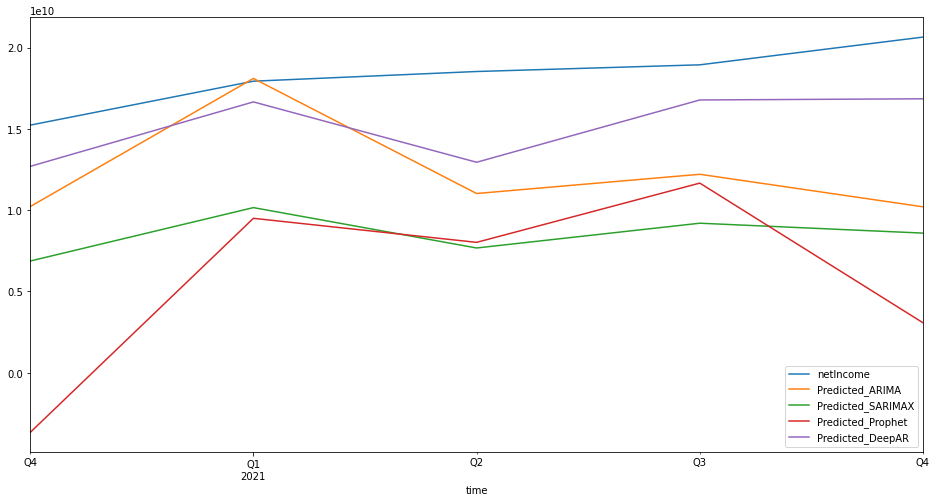

In [ ]:
test_data[['netIncome', 'Predicted_ARIMA', 'Predicted_SARIMAX', # 'Predicted_DLT_LogLinear', 'Predicted_DLT_Flat', 
           'Predicted_Prophet', 'Predicted_DeepAR']].plot(figsize=(16,8))

## Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 4.713956644618461e+19
Mean Absolute Error is : 5970370061.031765
Root Mean Square Error is : 6865825984.263264
Mean Absolute Percentage Error is : 32.0923433554877
R2 score is : -14.197689274286773



In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 9.766718648294087e+19
Mean Absolute Error is : 9756704780.07393
Root Mean Square Error is : 9882671019.66573
Mean Absolute Percentage Error is : 53.33759670311671
R2 score is : -30.487679339522103



In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 1.8007249857710863e+20
Mean Absolute Error is : 12537169568.738886
Root Mean Square Error is : 13419109455.441095
Mean Absolute Percentage Error is : 70.28262503933408
R2 score is : -57.05496500150451



In [ ]:
timeseries_evaluation_metrics_func(test_data.netIncome, test_data.Predicted_DeepAR)

Evaluation metric results:-
Mean Square Error is : 1.1656071534771053e+19
Mean Absolute Error is : 3069522688.0
Root Mean Square Error is : 3414098934.5317826
Mean Absolute Percentage Error is : 16.737457762932237
R2 score is : -2.757891018080146



### Conclusion: 

Based on MSE and MAE values the DeepAR model provide the best predicition.
But given the R2 score are all negatives on all models, the result is not reliable. 